In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from matplotlib.patches import Ellipse

In [2]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor="none", **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    
    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.
    
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    
    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`
    
    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")
    
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    # using a special case to obtain the eigenvalues of this 2D dataset
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse(
        (0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
        facecolor=facecolor, **kwargs,
    )
    
    # calculating the standard deviation of x from the squareroot of the variance
    # and multiplying with the given number of standard deviations
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)
    
    # calculating the standard deviation of y
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D().rotate_deg(45).scale(scale_x, scale_y).translate(mean_x, mean_y)
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [3]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

In [4]:
np.random.seed(19380012)

In [5]:
parameters = {
    "positive correlation": [[0.85, 0.35], [0.15, -0.65]],
    "negative correlation": [[0.9, -0.4], [0.1, -0.6]],
    "weak correlation": [[1, 0], [0, 1]],
}

mu = 2, 4
scale = 3, 5

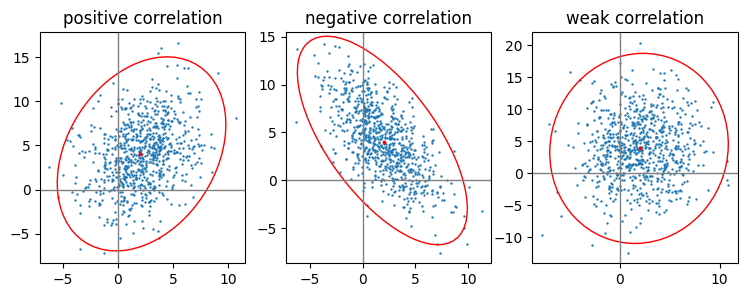

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for ax, (title, dependency) in zip(axs, parameters.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)
    
    ax.axvline(c="grey", lw=1)
    ax.axhline(c="grey", lw=1)
    
    confidence_ellipse(x, y, ax, edgecolor="red")
    
    ax.scatter(mu[0], mu[1], c="red", s=3)
    ax.set_title(title)

plt.show()

In [7]:
dependency_nstd = [[0.8, 0.75], [-0.2, 0.35]]
mu = 0, 0
sigma = 8, 5
x, y =get_correlated_dataset(500, dependency_nstd, mu, scale)

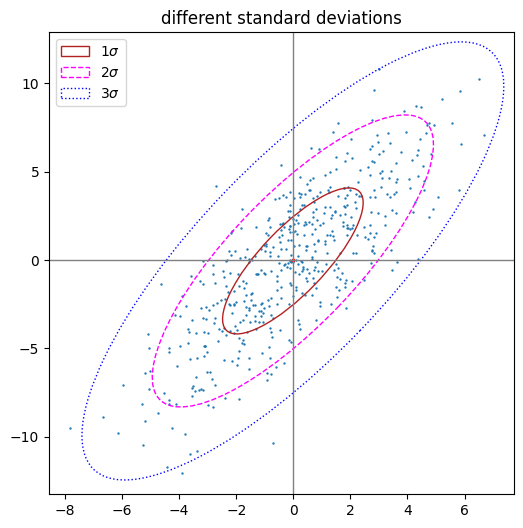

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.axvline(c="grey", lw=1)
ax.axhline(c="grey", lw=1)
ax.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax, n_std=1, label=r"$1\sigma$", edgecolor="firebrick")
confidence_ellipse(x, y, ax, n_std=2, label=r"$2\sigma$", edgecolor="fuchsia", linestyle="--")
confidence_ellipse(x, y, ax, n_std=3, label=r"$3\sigma$", edgecolor="blue", linestyle=":")

ax.scatter(mu[0], mu[1], c="red", s=3)
ax.set_title("different standard deviations")
ax.legend()

plt.show()